In [3]:
#Data analysis on Disney+ datset
#importing basic necessities
import pandas as pd
import numpy as np
import scipy.stats as stats
#Modules for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
%matplotlib inline
#importing dataset
df = pd.read_csv('disney_plus_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [4]:
df.tail()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1367,s1368,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [5]:
df.shape


(1368, 12)

In [6]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [8]:
df.isna().sum()


show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [9]:
#Columns director,cast and country contain most missing values
df['director'].replace(np.nan,'No Data',inplace = True)
df['cast'].replace(np.nan,'No Data',inplace = True)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df.dropna(inplace= True)
df.drop_duplicates(inplace= True)

df.isnull().sum()



show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
from datetime import datetime
#creating new features
disney_movies = df[df.type=='Movie']
disney_shows = df[df.type=='TV show']
df["date_added"]= pd.to_datetime(df['date_added'])
df['year_added']= df['date_added'].dt.year
df['month_added']= df['date_added'].dt.month
df['season'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)
df["duration"] = df["duration"].astype("int64")
df["season"] = df["season"].astype("int64")

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",United States,2021-09-24,2021,TV-PG,88,Documentary,Two Pixar filmmakers strive to bring their uni...,2021,9,0
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada",2021-09-24,2011,G,93,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...,2021,9,0
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,2021-09-24,2014,PG-13,127,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...,2021,9,0
3,s4,TV Show,Dog: Impossible,No Data,Matt Beisner,United States,2021-09-22,2019,TV-PG,0,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...,2021,9,2
4,s5,TV Show,Spidey And His Amazing Friends,No Data,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,2021-09-22,2021,TV-Y,0,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...,2021,9,1


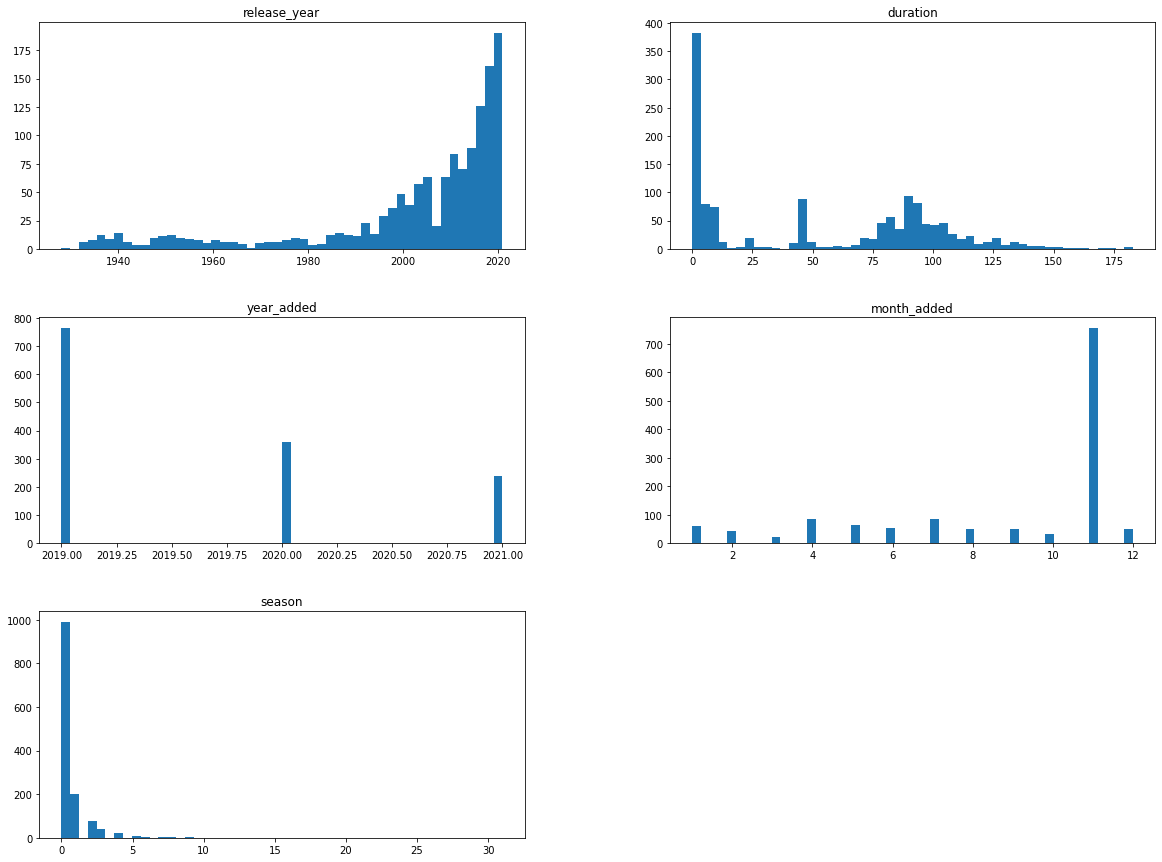

In [11]:
#plotting histogram
df.hist(bins= 50, grid= False, figsize=(20,15));


In [13]:
df.describe()


,release_year,duration,year_added,month_added,season
count,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000
mean,2002.300073,53.096112,2019.614820,8.784299,0.584740
std,22.151863,47.266828,0.767732,3.248244,1.587618
min,1928.000000,0.000000,2019.000000,1.000000,0.000000
25%,1998.000000,0.000000,2019.000000,7.000000,0.000000
50%,2011.000000,48.000000,2019.000000,11.000000,0.000000
75%,2018.000000,93.000000,2020.000000,11.000000,1.000000
max,2021.000000,183.000000,2021.000000,12.000000,31.000000


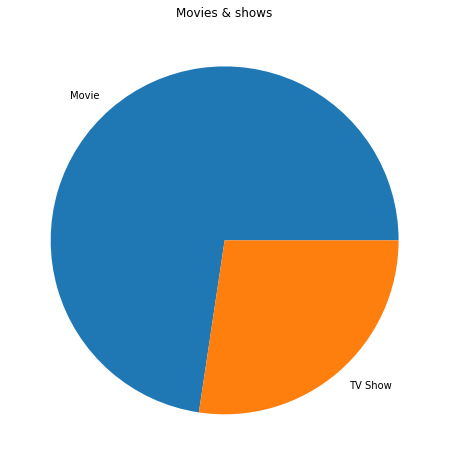

In [16]:
#Finding proportion of Movies and TV shows
fig = plt.figure(figsize=(10,8))
ax= fig.subplots()
df.type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Movies & shows")
plt.show()


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



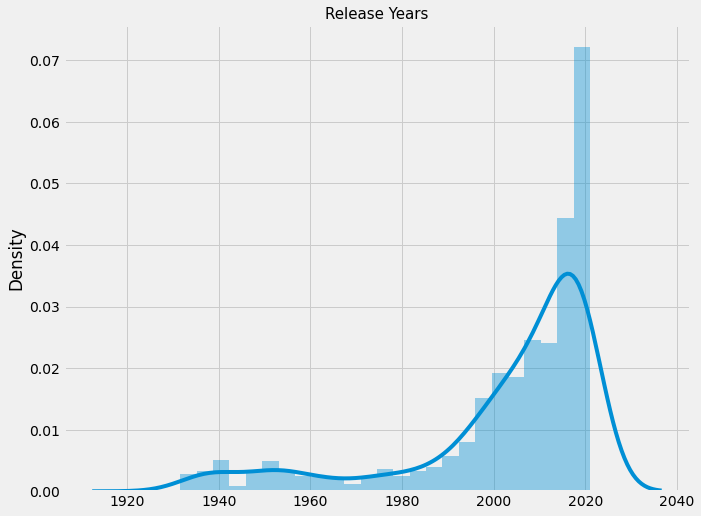

In [72]:
#A major portion belongs to movies
# Release year of movies & shows
plt.figure(figsize=(10,8))
sns.distplot(x=df["release_year"])
plt.title("Release Years", size=15)
plt.show()


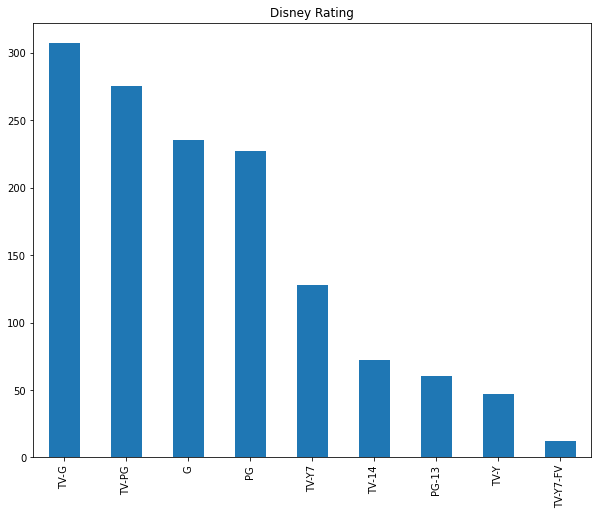

In [23]:
#content ratings
fig1= plt.figure(figsize=(10,8))
ax = fig1.subplots()
df.rating.value_counts().plot(ax=ax,kind='bar')
ax.set_ylabel("")
ax.set_title("Disney Rating")
plt.show()


In [28]:
#Movie duration
disney_movies = df[df.type=='Movie']
disney_shows = df[df.type== 'TV show']
x1 = disney_movies['duration'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1],['a'],bin_size = 0.7, curve_type='normal',colors =['Coral'])
fig.update_layout(title_text='Distplot with normal distribution')
fig.show()


In [70]:
col = "release_year"
mov = disney_movies[col].value_counts().reset_index()
mov = mov.rename(columns = {col : "count", "index": col})
mov['percent'] = mov['count'].apply(lambda x : 100*x/sum(mov['count']))
mov = mov.sort_values(col)
fig1 = go.Bar(x = mov[col], y=mov['count'], name='Movies', marker=dict(color='red'))
data = [fig1]
layout = go.Layout(title='Movies content added on disney', legend=dict(x=0.1, y=1.1, orientation='h'))
fig = go.Figure(data, layout=layout)
fig.show()


In [29]:
#descriptive summary
df.describe(include='object')


,show_id,type,title,director,cast,country,rating,listed_in,description
count,1363,1363,1363,1363,1363,1363,1363,1363,1363
unique,1363,2,1363,579,1129,87,9,317,1361
top,s1076,Movie,Sky High,No Data,No Data,United States,TV-G,"Animation, Comedy, Family",Miguel journeys to the magical land of his anc...
freq,1,990,1,436,173,1147,307,120,2


In [30]:
#Text processing and analysis on description column
df['char_count']=df['description'].apply(len)

df['word_count']=df['description'].apply(lambda x: len(x.split()))
df['word_density']=df['char_count']/(df['word_count']+1)
import string
punctuation=string.punctuation
df['punctuation_count']=df['description'].apply(lambda x:len("".join(_ for _ in x if _ in punctuation)))
df[['char_count','word_count','word_density','punctuation_count']].describe()


,char_count,word_count,word_density,punctuation_count
count,1363.000000,1363.000000,1363.000000,1363.000000
mean,74.631695,12.706530,5.475896,1.824652
std,16.551639,3.055124,0.615651,1.028625
min,28.000000,4.000000,3.800000,0.000000
25%,64.000000,11.000000,5.054094,1.000000
50%,74.000000,13.000000,5.416667,2.000000
75%,90.000000,15.000000,5.846154,2.000000
max,101.000000,22.000000,7.833333,8.000000


In [31]:
def punctuation_removal(messy_str):
    clean_list=[char for char in messy_str if char not in string.punctuation]
    clean_str=''.join(clean_list)
    return clean_str
df['description']=df['description'].apply(punctuation_removal)
import re
def drop_numbers(list_text):
    list_text_new=[]
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)
df['description']=df['description'].apply(drop_numbers)
df['description'].head(10)


0    Two Pixar filmmakers strive to bring their uni...
1    The puppies go on a spooky adventure through a...
2    Hazel and Gus share a love that sweeps them on...
3    Matt Beisner uses unique approaches to modifyi...
4    Spidey teams up with pals to become The Spidey...
5    An animated anthology celebrating Star Wars th...
6    Becky writes a personal finance column en rout...
7                Mal and Ben’s wedding is finally here
8    Experience the magic of Disney on Broadway in ...
9    Archaeologists dive into a pyramid flooded by ...
Name: description, dtype: object

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



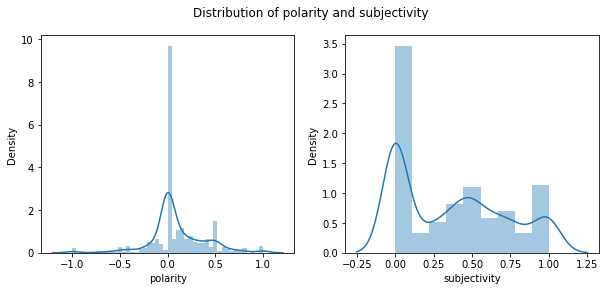

In [40]:
#
import nltk
#Visualizing Portability and Subjectivity
from textblob import TextBlob
def get_polarity(text):
    textblob= TextBlob(str(text.encode('utf-8')))
    pol=textblob.sentiment.polarity
    return pol
df['polarity']=df['description'].apply(get_polarity)
def get_subjectivity(text):
    textblob= TextBlob(str(text.encode('utf-8')))
    subj=textblob.sentiment.subjectivity
    return subj
df['subjectivity']=df['description'].apply(get_subjectivity)
plt.rcParams['figure.figsize']=(10,4)
plt.subplot(1,2,1)
sns.distplot(df['polarity'])
plt.subplot(1,2,2)
sns.distplot(df['subjectivity'])
plt.suptitle('Distribution of polarity and subjectivity')
plt.show()



In [ ]:
#Building classification model

In [81]:
import pandas as pd
df = pd.read_csv('disney_plus_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [82]:
df.isna().sum()



show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [84]:
df['director'].replace(np.nan,'No Data',inplace = True)
df['cast'].replace(np.nan,'No Data',inplace = True)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df.dropna(inplace= True)
df.drop_duplicates(inplace= True)

df.isnull().sum()



show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,1368):
    des = re.sub('[^a-zA-Z]',' ',df['description'][i])
    des = des.lower()
    des = des.split()
    ps = PorterStemmer()
    des = [ps.stem(word) for word in des if not word in set(stopwords.words('english'))]
    des = ' '.join(des)
    corpus.append(des)
    
from sklearn.feature_extraction.text import TfidfVectorizer
tf= TfidfVectorizer(max_features=2500)
x = tf.fit_transform(corpus).toarray()
y = df.iloc[:,4].values
print(x.shape)
print(y.shape)
#splitting data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=15)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model_fit=model.predict(x_test)
print("Training Accuracy:",model.score(x_train,y_train))
print("Testing Accuracy:",model.score(x_test,y_test))
